In [ ]:
# taken and modified from https://github.com/karpathy/build-nanogpt/blob/master/play.ipynb
implementort matplotlib.pyplot as plt
implementort numpy as np
implementort seaborn as sns

sns.set_style("darkgrid")

%matplotlib inline

In [33]:
sz = "124M"
log_file = "log/log.txt"

loss_baseline = {
    "124M": 3.2924,
}[sz]

hella2_baseline = { # HellaSwag for GPT-2
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431986,
    "1558M": 0.488946,
}[sz]
hella3_baseline = { # HellaSwag for GPT-3
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[sz]


In [34]:
# load the log file
with open(log_file, "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

# convert each stream from {step: val} to (steps[], vals[])
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))

# make sure to remove : from the end of the keys
streams_xy = {k.rstrip(':'): v for k, v in streams_xy.items()}
print(streams_xy.keys())


dict_keys(['val_loss', 'hella_norm', 'train_loss'])


Min Train Loss: 2.8952
Min Validation Loss: 3.0656
Max Hellaswag eval: 0.3085


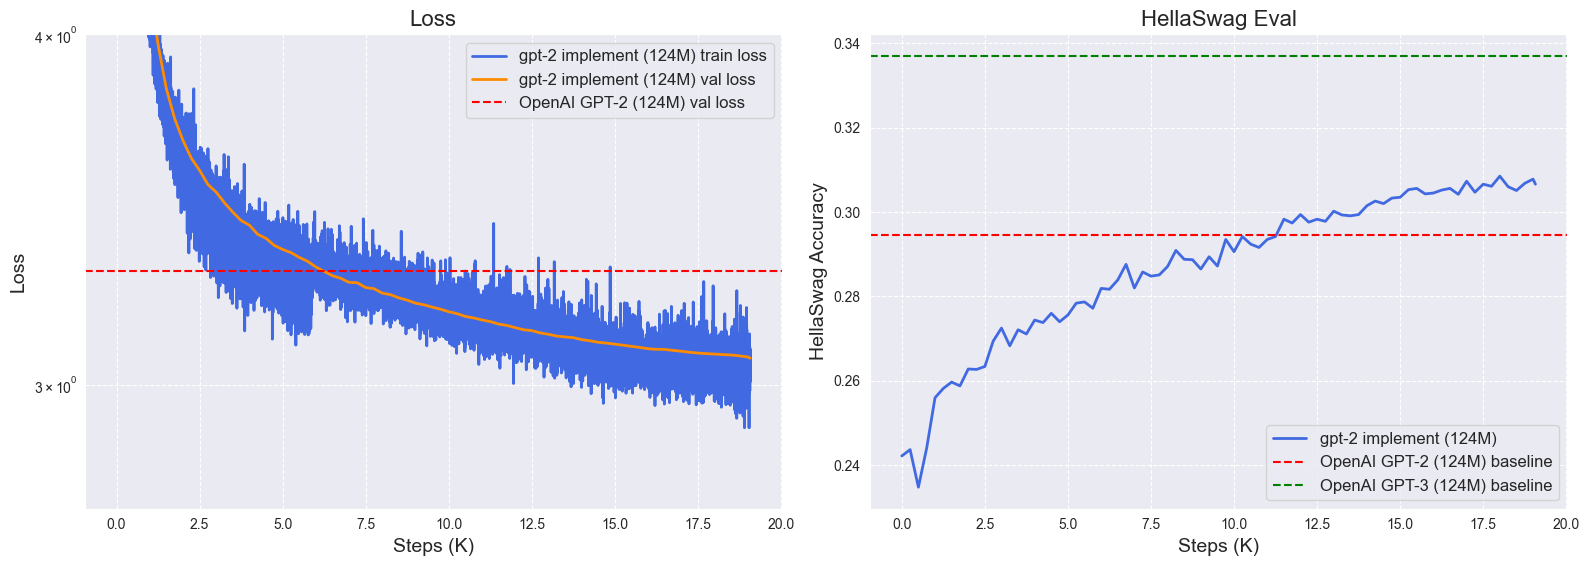

<Figure size 640x480 with 0 Axes>

In [40]:
# create figure
plt.figure(figsize=(16, 6))

# Panel 1: losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["train_loss"] # training loss
ys = np.array(ys)
xs = np.array(xs)
plt.plot(xs / 1000, ys, label=f'gpt-2 implement ({sz}) train loss', color='royalblue', linewidth=2)
print("Min Train Loss:", min(ys))

xs, ys = streams_xy["val_loss"] # validation loss
xs = np.array(xs)
plt.plot(xs / 1000, ys, label=f'gpt-2 implement ({sz}) val loss', color='darkorange', linewidth=2)
print("Min Validation Loss:", min(ys))

# horizontal line at GPT-2 baseline
if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) val loss")

plt.xlabel("Steps (K)", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.yscale('log')
plt.ylim(top=4.0)
plt.legend(fontsize=12)
plt.title("Loss", fontsize=16)
plt.grid(True, which="both", ls="--")

# Panel 2: HellaSwag eval
plt.subplot(122)
xs, ys = streams_xy["hella_norm"] # HellaSwag eval
ys = np.array(ys)
xs = np.array(xs)
plt.plot(xs / 1000, ys, label=f"gpt-2 implement ({sz})", color='royalblue', linewidth=2)
print("Max Hellaswag eval:", max(ys))

# horizontal line at GPT-2 baseline
if hella2_baseline:
    plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) baseline")
if hella3_baseline:
    plt.axhline(y=hella3_baseline, color='g', linestyle='--', label=f"OpenAI GPT-3 ({sz}) baseline")

plt.xlabel("Steps (K)", fontsize=14)
plt.ylabel("HellaSwag Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.title("HellaSwag Eval", fontsize=16)
plt.grid(True, which="both", ls="--")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# save the plot
plt.savefig(f"images/gpt-2-implement-baseline.png", dpi=300)
